## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Upscale the images by **4 times** on its respective dimensions. Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from utils import display_images

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [ ]:
#Exercise 1

img = cv.imread("images/dog.jfif")

cv.imshow("Dog Images",img)

cv.waitKey(0) 
cv.imwrite("dog.png", img)

cv.destroyAllWindows()

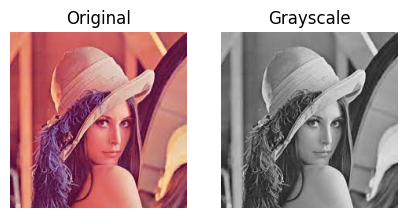

In [7]:
#Exercise 2 

img_ori = cv.imread('images/lena.jfif')
img_grayscale = cv.imread('images/lena.jfif', 0)

#First Way
cv.imshow("Original",img_ori)
cv.imshow("Grayscale",img_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

#Second Way
plt.figure(figsize=(5,5))

plt.subplot(1, 2, 1) #plt.subplot(rows, cols, index)
plt.imshow(cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)) 
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_grayscale,cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.show()

In [25]:
# Exercise 3 
vid = cv.VideoCapture("videos/img_pexels.mp4")

if not vid.isOpened():
    raise Exception("No ideo detected")

width = int(vid.get(cv.CAP_PROP_FRAME_WIDTH)) 
height = int(vid.get(cv.CAP_PROP_FRAME_HEIGHT))  

new_width = width // 2
new_height = height // 2

fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 60
out = cv.VideoWriter("smaller_img_pexels.avi", fourcc, fps, (new_width, new_height))

while vid.isOpened():
    ret, frame = vid.read()  # ret is status, frame is the image

    if not ret:
        print("Can't receive frame")
        break
        
    resized_frame = cv.resize(frame, (new_width, new_height))
    cv.imshow("Video", resized_frame)
    out.write(resized_frame)

    if cv.waitKey(1) & 0xFF == 27:
        break

vid.release()
out.release()
cv.destroyAllWindows()

In [2]:
# Exercise 4
img4=cv.imread("images/dog.jfif")

new_width = img4.shape[0] * 4
new_height=img4.shape[1] * 4

def resize_image(img4,width,height,interpolation):
    start_time=time.time()
    resized= cv.resize(img4,(width,height),interpolation=interpolation)
    end_time=time.time()
    time_used = end_time-start_time
    return resized,time_used

img_linear,time_linear=resize_image(img4,new_width,new_height,cv.INTER_LINEAR)
img_cubic, time_cubic = resize_image(img4, new_width, new_height, cv.INTER_CUBIC)
img_nearest, time_nearest = resize_image(img4, new_width, new_height, cv.INTER_NEAREST)

print(f"Linear Interpolation\nTime: {(time_linear*1000):.4f} ms")
print(f"Cubic Interpolation\nTime: {(time_cubic*1000):.4f} ms")
print(f"Nearest Neighbor\nTime: {(time_nearest*1000):.4f} ms")

display_images([img4, img_linear,img_cubic,img_nearest], titles=["Original", "Linear Interpolation", "Cubic Interpolation", "Nearest Neighbor"])

Linear Interpolation
Time: 0.0000 ms
Cubic Interpolation
Time: 0.0000 ms
Nearest Neighbor
Time: 15.7132 ms
